<h1> DS200A Computer Vision Assignment</h1>

In [42]:
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage.io import imread_collection
import cv2
import seaborn as sns
import scipy.stats as sc
import os
from skimage import img_as_ubyte
from skimage import feature
from skimage.transform import resize
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import mahotas
import joblib
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from tensorflow import set_random_seed

<h2>  Part Four: Neural networks </h2>	


Build a neural network classifier using an architecture of your choosing. This application
of deep learning can be done in PyTorch, TensorFlow, or a framework of your choice. This is the
industry standard for image classification. Describe your network and assess its performance. To
receive extra credit, your neural network classifier must outperform your other methods.



In [31]:
def plot_loss_acc(training):
    
    # Extract the history from the training object
    history = training.history

    # Plot the training loss 
    plt.plot(history['loss'], label = 'train_loss')
    # Plot the validation loss
    plt.plot(history['val_loss'], label = 'val_loss')

    # Show the figure
    plt.legend()
    plt.show()

    # Plot the training loss 
    plt.plot(history['acc'], label = 'train_acc')
    # Plot the validation loss
    plt.plot(history['val_acc'], label = 'val_acc')

    # Show the figure
    plt.legend()
    plt.show()

def train_test_split(df, ratio, rand_state = 1234):
    train=df.sample(frac = ratio, random_state = rand_state)
    test=df.drop(train.index)
    return train, test

### No Convolutions

In [94]:
### Data Prep
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_data = X_train.reshape((60000, 784))
test_data = X_test.reshape(10000,784)
train_labels = y_train

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 52us/step - loss: 6.2595 - acc: 0.6042 - val_loss: 4.0258 - val_acc: 0.7444

Epoch 00001: val_acc improved from -inf to 0.74442, saving model to Dens_model_mnist.hdf5
Epoch 2/20
48000/48000 [==============================] - 2s 36us/step - loss: 3.5134 - acc: 0.7770 - val_loss: 3.2312 - val_acc: 0.7963

Epoch 00002: val_acc improved from 0.74442 to 0.79625, saving model to Dens_model_mnist.hdf5
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 3.2518 - acc: 0.7949 - val_loss: 3.9741 - val_acc: 0.7498

Epoch 00003: val_acc did not improve from 0.79625
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 3.1898 - acc: 0.7994 - val_loss: 2.9682 - val_acc: 0.8135

Epoch 00004: val_acc improved from 0.79625 to 0.81350, saving model to Dens_model_mnist.hdf5
Epoch 5/20
48000/48000 [==============================] - 2s 37us/step -

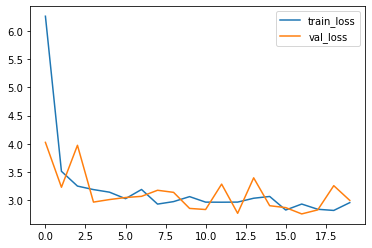

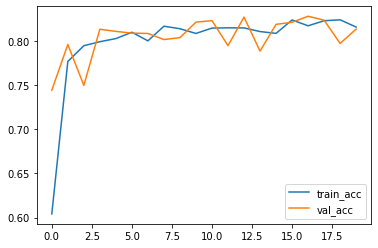

In [95]:
# setting seed
seed(1)
set_random_seed(2)
seed(1234)

### Model definition

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="Dens_model_mnist.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]

training = model.fit(train_data, train_labels, validation_split=0.2, epochs=20, callbacks=callbacks_list)
plot_loss_acc(training)

### With Convolutions

In [28]:
### Data Prep
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train.shape

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_data = X_train.reshape((60000, 28,28, 1))
test_data = X_test.reshape(10000,28, 28, 1)
train_labels = y_train

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 127us/step - loss: 0.4265 - acc: 0.8971 - val_loss: 0.1508 - val_acc: 0.9553

Epoch 00001: val_acc improved from -inf to 0.95525, saving model to Conv_model_mnist.hdf5
Epoch 2/20
48000/48000 [==============================] - 6s 117us/step - loss: 0.1159 - acc: 0.9664 - val_loss: 0.1406 - val_acc: 0.9631

Epoch 00002: val_acc improved from 0.95525 to 0.96308, saving model to Conv_model_mnist.hdf5
Epoch 3/20
48000/48000 [==============================] - 6s 117us/step - loss: 0.0724 - acc: 0.9784 - val_loss: 0.1150 - val_acc: 0.9678

Epoch 00003: val_acc improved from 0.96308 to 0.96783, saving model to Conv_model_mnist.hdf5
Epoch 4/20
48000/48000 [==============================] - 6s 119us/step - loss: 0.0570 - acc: 0.9832 - val_loss: 0.1246 - val_acc: 0.9674

Epoch 00004: val_acc did not improve from 0.96783
Epoch 5/20
48000/48000 [==============================] - 6s 123us/s

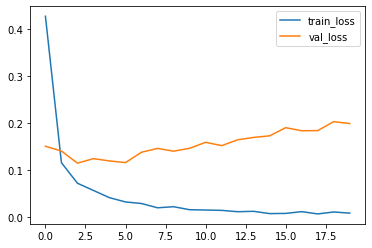

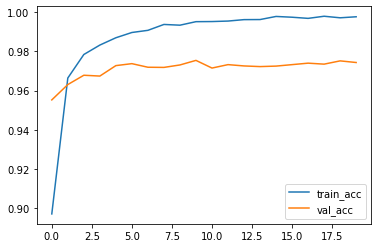

In [29]:
### Model definition

model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28,28,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="Conv_model_mnist.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]

training = model.fit(train_data, train_labels, validation_split=0.2, epochs=20, callbacks=callbacks_list)
plot_loss_acc(training)

In [41]:
def NN():
    raise NotImplemented()

### Hyperparameter Tuning

In [ ]:
random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

clf = DecisionTreeClassifier()

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 300, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

## Project Dataset

In [70]:
def gray_to_rgb(image):
    if len(image.shape) == 2:
        return skimage.color.gray2rgb(image)
    else:
        return image
def img_resize(image):
    return resize(image, (224, 224), anti_aliasing=True)

def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    label_list = next(os.walk(file_path))[1]
    label_list.sort()
    label_dict = {}
    for i in range(20):
        label_dict[i] = label_list[i]
    labels = list(label_dict.values())
    return_db = pd.DataFrame(columns = ['Pictures', 'Label','Encoding', 'File_Path'])
    for enc, label in label_dict.items():
        path = os.path.join(os.getcwd(),file_path + '/' + label)
        file_path_list = [path + '/' + x for x in os.listdir(path)]
        sub_db = pd.DataFrame()
        sub_db['Pictures'] = list(imread_collection(file_path_list))
        sub_db['Label'] = label
        sub_db['Encoding'] = enc
        sub_db['File_Path'] = file_path_list
        return_db = pd.concat([return_db, sub_db])
    return_db = return_db.reset_index()
    return_db['Pictures'] = return_db['Pictures'].apply(gray_to_rgb)
    return_db['Pictures'] = return_db['Pictures'].apply(img_resize)
    
    return return_db
    

In [71]:
starting_data = read_organize_data('20_categories_training/20_categories_training')
starting_data.head()

,index,Pictures,Label,Encoding,File_Path
0,0,"[[[0.996078431372549, 0.996078431372549, 0.996...",airplanes,0,/Users/vikrant/Classes/DS_100/final_project/20...
1,1,"[[[0.3605124080882322, 0.2358223367471956, 0.0...",airplanes,0,/Users/vikrant/Classes/DS_100/final_project/20...
2,2,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",airplanes,0,/Users/vikrant/Classes/DS_100/final_project/20...
3,3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",airplanes,0,/Users/vikrant/Classes/DS_100/final_project/20...
4,4,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",airplanes,0,/Users/vikrant/Classes/DS_100/final_project/20...


In [100]:
train, test = train_test_split(starting_data, ratio = 0.8)

y_train = to_categorical(train['Encoding'])

img_list = []
for i in range(len(train)):
    img_list.append(train['Pictures'].iloc[i]) 
X_train = np.array(img_list)

train_data = X_train
train_labels = y_train

Train on 960 samples, validate on 241 samples
Epoch 1/20
960/960 [==============================] - 14s 15ms/step - loss: 11.4032 - acc: 0.1375 - val_loss: 10.2922 - val_acc: 0.1909
Epoch 2/20
960/960 [==============================] - 13s 14ms/step - loss: 5.8352 - acc: 0.2260 - val_loss: 2.8476 - val_acc: 0.2531
Epoch 3/20
960/960 [==============================] - 13s 14ms/step - loss: 2.6586 - acc: 0.2958 - val_loss: 2.7069 - val_acc: 0.2365
Epoch 4/20
960/960 [==============================] - 13s 14ms/step - loss: 2.1280 - acc: 0.4021 - val_loss: 2.5020 - val_acc: 0.2822
Epoch 5/20
960/960 [==============================] - 14s 14ms/step - loss: 1.4579 - acc: 0.6021 - val_loss: 2.6038 - val_acc: 0.2863
Epoch 6/20
960/960 [==============================] - 14s 14ms/step - loss: 0.7883 - acc: 0.8021 - val_loss: 2.7730 - val_acc: 0.3029
Epoch 7/20
960/960 [==============================] - 13s 14ms/step - loss: 0.4027 - acc: 0.9156 - val_loss: 2.9843 - val_acc: 0.3568
Epoch 8/20
960

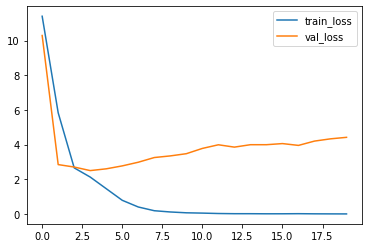

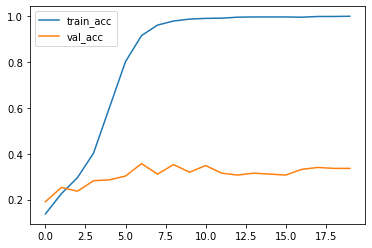

In [101]:
model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(224,224,3), padding = 'same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit(train_data, train_labels, validation_split=0.2, epochs=20)
plot_loss_acc(training)

In [96]:
train, test = train_test_split(starting_data, ratio = 0.8)

y_train = to_categorical(train['Encoding'])

img_list = []
for i in range(len(train)):
    img_list.append(train['Pictures'].iloc[i]) 
X_train = np.array(img_list)

train_data = X_train.reshape(1201, 224*224*3)
train_labels = y_train

Train on 960 samples, validate on 241 samples
Epoch 1/20
960/960 [==============================] - 4s 4ms/step - loss: 14.6882 - acc: 0.0615 - val_loss: 15.3824 - val_acc: 0.0456

Epoch 00001: val_acc improved from -inf to 0.04564, saving model to Dens_model_mnist.hdf5
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 15.0771 - acc: 0.0646 - val_loss: 15.3824 - val_acc: 0.0456

Epoch 00002: val_acc did not improve from 0.04564
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 15.0771 - acc: 0.0646 - val_loss: 15.3824 - val_acc: 0.0456

Epoch 00003: val_acc did not improve from 0.04564
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 15.0771 - acc: 0.0646 - val_loss: 15.3824 - val_acc: 0.0456

Epoch 00004: val_acc did not improve from 0.04564
Epoch 5/20
960/960 [==============================] - 2s 3ms/step - loss: 15.0771 - acc: 0.0646 - val_loss: 15.3824 - val_acc: 0.0456

Epoch 00005: val_acc did not improve fr

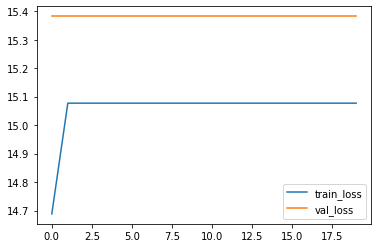

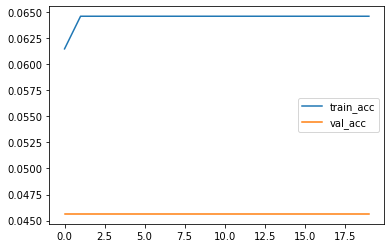

In [99]:
# setting seed
seed(1)
set_random_seed(2)
seed(1234)

### Model definition

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(224*224*3,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="Dens_model_mnist.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]

training = model.fit(train_data, train_labels, validation_split=0.2, epochs=20, callbacks=callbacks_list)
plot_loss_acc(training)

In [88]:
np.array(ar).shape

(10, 224, 224, 3)